In [ ]:

import pandas as pd #importando pandas
import matplotlib.pyplot as plt #importando matplotlib

# Configurar opções do pandas para melhor visualização
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)


In [ ]:
from google.colab import drive #importando o googledrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# criando o df a partir do csv
df = pd.read_csv("/content/drive/MyDrive/PI - Nilton/Dados Consolidados - Página1.csv", sep=',', encoding="utf-8") #path do arquivo

In [ ]:
df.head(3) #testando se deu certo

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor
0,SE,SP,São Paulo,M,mais de 70 anos,2023-05-01,10.0,Cemig,Energia Elétrica,"Água, Energia, Gás",Energia Elétrica,Cobrança / Contestação,Renegociação / parcelamento de dívida,Telefone,S,S,Finalizada não avaliada,Não Avaliada,NaN
1,SE,RJ,Rio de Janeiro,M,mais de 70 anos,2023-05-01,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Consignado / Cartão de Crédito Consign...,Vício de Qualidade,Margem consignável - bloqueio/ contestação,Não comprei / contratei,N,S,Finalizada não avaliada,Não Avaliada,NaN
2,SE,RJ,Rio de Janeiro,M,mais de 70 anos,2023-05-01,10.0,Itaú Consignado,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Atendimento Bancário,Vício de Qualidade,"Clonagem, fraude, furto e roubo",Não comprei / contratei,N,S,Finalizada não avaliada,Não Avaliada,NaN


<Figure size 1000x600 with 0 Axes>

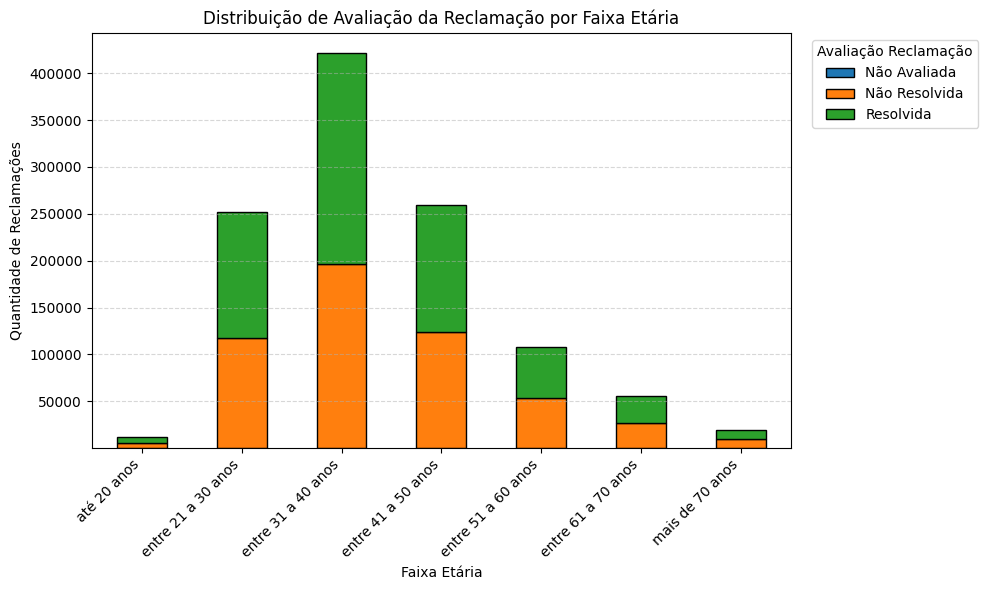

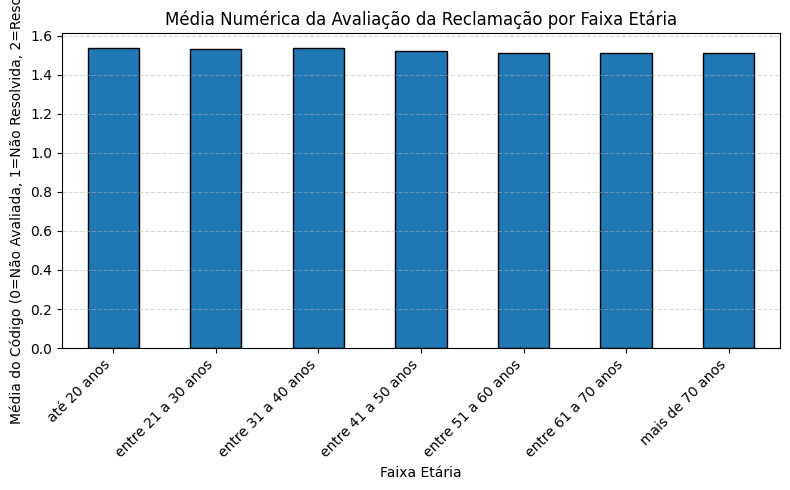

In [151]:

import pandas as pd
import matplotlib.pyplot as plt

# 1. (Já assumimos que df foi carregado via pd.read_csv)
#    df = pd.read_csv('seu_arquivo.csv', sep=';', encoding='utf-8')

# 1.1. Limpa possíveis espaços em branco na faixa etária
df['Faixa Etária'] = df['Faixa Etária'].str.strip()

# 1.2. Converte “Avaliação Reclamação” para categoria ordenada + código numérico
categorias = ['Não Avaliada', 'Não Resolvida', 'Resolvida']
df['Avaliação Reclamação cat'] = pd.Categorical(
    df['Avaliação Reclamação'].fillna('Não Avaliada'),
    categories=categorias,
    ordered=True
)
df['Avaliação Reclamação num'] = df['Avaliação Reclamação cat'].cat.codes

# 2. Monta a tabela de contingência (crosstab)
ct = pd.crosstab(df['Faixa Etária'], df['Avaliação Reclamação'])

# 3. Gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
ct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    edgecolor='black'
)
plt.title('Distribuição de Avaliação da Reclamação por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Reclamações')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Avaliação Reclamação', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 4. Gráfico de média numérica de avaliação por faixa etária
media_por_faixa = df.groupby('Faixa Etária')['Avaliação Reclamação num'].mean().sort_index()
plt.figure(figsize=(8, 5))
media_por_faixa.plot(kind='bar', edgecolor='black')
plt.title('Média Numérica da Avaliação da Reclamação por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Média do Código (0=Não Avaliada, 1=Não Resolvida, 2=Resolvida)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



=== Tabela de Contingência (Canal × Avaliação) ===
Avaliação Reclamação     Não Avaliada  Não Resolvida  Resolvida
Como Comprou Contratou                                         
Catálogo                            0           2185       2306
Domicílio                           0          11116      12042
Ganhei de presente                  0           2465       1872
Internet                            3         308244     332145
Loja física                         1          70720      72457
Não comprei / contratei             0          91465      98619
SMS / Mensagem de texto             0           3093       3406
Stand, feiras e eventos             0           1194       1431
Telefone                            2          42844      71495


<Figure size 1000x600 with 0 Axes>

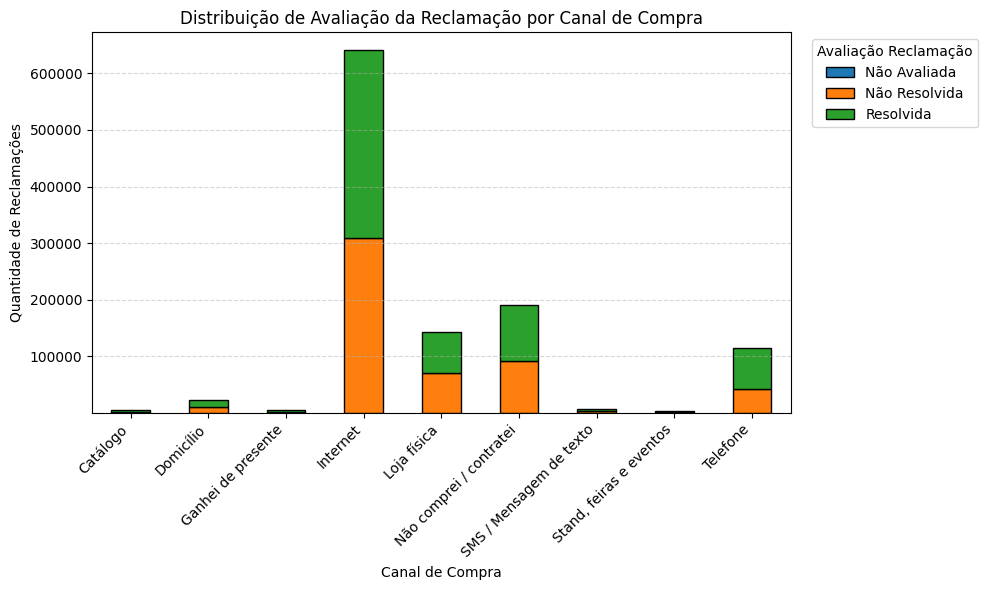


=== Percentual de Reclamações Resolvidas por Canal ===
                         total_registros  total_resolvidas  pct_resolvidas_%
Como Comprou Contratou                                                      
Catálogo                            4491              2306         51.347139
Domicílio                          23158             12042         51.999309
Ganhei de presente                  4337              1872         43.163477
Internet                          640392            332145         51.865888
Loja física                       143178             72457         50.606238
Não comprei / contratei           190084             98619         51.881800
SMS / Mensagem de texto             6499              3406         52.408063
Stand, feiras e eventos             2625              1431         54.514286
Telefone                          114341             71495         62.527877


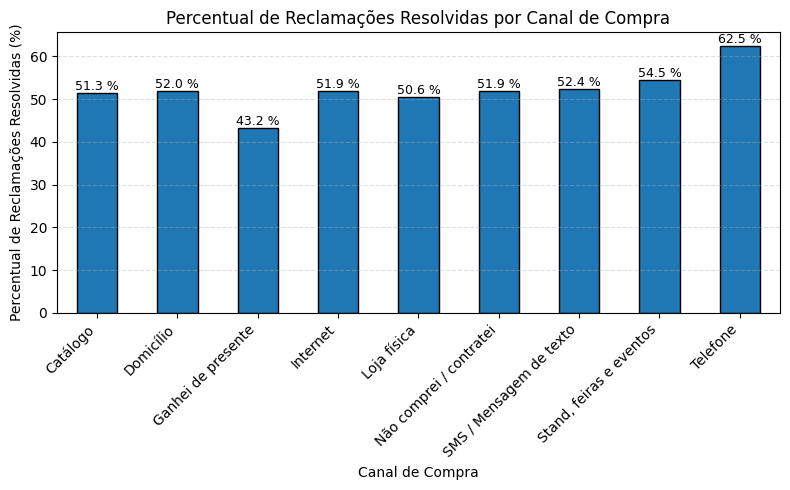

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================
# 0) Carregar o DataFrame
# ============================
# Exemplo de leitura (caso ainda não tenha carregado):
# df = pd.read_csv('dados_reclamacoes.csv', sep=';', encoding='utf-8')

# ============================
# 1) Limpeza e preenchimento
# ============================
df['Como Comprou Contratou'] = df['Como Comprou Contratou'].astype(str).str.strip()
df['Como Comprou Contratou'] = df['Como Comprou Contratou'].fillna('Desconhecido')

# ============================
# 2) Preparar coluna booleana “Resolvida?”
# ============================
df['Avaliação Reclamação'] = df['Avaliação Reclamação'].fillna('Não Avaliada')
df['Resolvida?'] = df['Avaliação Reclamação'] == 'Resolvida'

# ============================
# 3) Crosstab: contagem de cada avaliação por canal
# ============================
ct = pd.crosstab(df['Como Comprou Contratou'], df['Avaliação Reclamação'])

print("=== Tabela de Contingência (Canal × Avaliação) ===")
print(ct)

# ============================
# 4) Gráfico de barras empilhadas
# ============================
plt.figure(figsize=(10, 6))
ct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    edgecolor='black'
)
plt.title('Distribuição de Avaliação da Reclamação por Canal de Compra')
plt.xlabel('Canal de Compra')
plt.ylabel('Quantidade de Reclamações')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Avaliação Reclamação', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# ============================
# 5) Calcular percentual de resolvidas por canal
# ============================
agrup_canal = df.groupby('Como Comprou Contratou')['Resolvida?'].agg(
    total_registros='count',
    total_resolvidas='sum'
)

agrup_canal['pct_resolvidas'] = agrup_canal['total_resolvidas'] / agrup_canal['total_registros']
agrup_canal['pct_resolvidas_%'] = agrup_canal['pct_resolvidas'] * 100

# CORREÇÃO NA LINHA ABAIXO: nomes de colunas e fechamento correto de colchetes
print("\n=== Percentual de Reclamações Resolvidas por Canal ===")
print(agrup_canal[['total_registros', 'total_resolvidas', 'pct_resolvidas_%']])

# ============================
# 6) Gráfico de barras do percentual de resolvidas
# ============================
plt.figure(figsize=(8, 5))
ax = agrup_canal['pct_resolvidas_%'].plot(
    kind='bar',
    edgecolor='black'
)
ax.set_title('Percentual de Reclamações Resolvidas por Canal de Compra')
ax.set_xlabel('Canal de Compra')
ax.set_ylabel('Percentual de Reclamações Resolvidas (%)')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    altura = p.get_height()
    if not pd.isna(altura):
        ax.annotate(f'{altura:.1f} %',
                    (p.get_x() + p.get_width() / 2, altura),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


